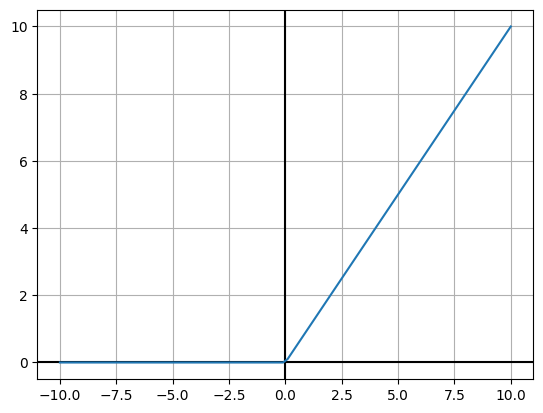

In [2]:
# Toto je pomocná funkce pro zobrazení grafu funkce, kterou nemusíte zkoumat.
import numpy as np
import matplotlib.pyplot as plt

def display_function(function, x_min, x_max):
    x = np.linspace(x_min, x_max, 100)
    y = function(x)

    # nastavíme pozici nulového bodu
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    plt.grid(True)

    plt.plot(x, y)



# Několik příkladů jednoduchých funkcí

def identity(x):
    '''
    Funkce identity - vrací vstupní hodnotu
    '''
    y = x
    return y

def linear(x, a=1, b=2):
    '''
    Funkce lineární - vrací hodnotu vstupu vynásobenou konstantou "a" a zvýšenou o konstantu "b"

    Parametry:
    a - násobítko, točítko
    b - přičítátko, posouvátko
    '''
    y = a*x + b
    return y

def quadratic(x, a=1, b=2, c=3):
    '''
    Funkce kvadratická - vrací hodnotu vstupu umocněnou na druhou, vynásobenou konstantou "a", zvýšenou o konstantu "b*x" a zvýšenou o konstantu "c"
    '''
    y = a*x**2 + b*x + c
    return y

def ReLU(x):
    '''
    Funkce ReLU - vrací hodnotu vstupu, pokud je větší než nula, jinak vrací nulu.
    (V machine learningu se používá velmi často jako součást neuronové sítě.)
    '''
    y = np.maximum(0, x)
    return y

def sinus(x):
    '''
    Funkce sinus - vrací hodnotu sinus z vstupu
    '''
    y = np.sin(x)
    return y


# Zde si můžete vyzkoušet, jak fungují jednotlivé funkce
# Pro zobrazení grafu funkce zavolejte funkci display_function s názvem některé z výše uvedených funkcí a rozsahem, ve kterém chcete funkci zobrazit
display_function(ReLU, -10, 10)

# Vliv vah na podobu lineární funkce

- Grafem lineární funkce je přímka.
- Budeme teď použávat terminologii ML a přejmenujeme si "a" a "b" na w_1 a w_2.
    - Chování lineární funkce se tím nijak nemění, jen tomu řkáme jinak.
- Vyzkoušejte, jak změna w_1 a w_2 změní průběh funkce
- (Tady neměňte kód, pracujte jen se slidery.)

In [ ]:
from ipywidgets import widgets, interact
import numpy as np
import matplotlib.pyplot as plt


# Nová definice lineární funkce, "a" a "b" se teď jmenují w_1 a w_2
def linear(x, w_1=1, w_2=2):
    y = w_1*x + w_2
    return y

# Zobrazovač lineární funkce
def display_linear_function(x_min, x_max, x_point, w_1=1, w_2=2):
    x = np.linspace(x_min, x_max, 100)
    y = linear(x, w_1=w_1, w_2=w_2)

    # nastavíme pozici nulového bodu
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    # nastavíme rozsah zobrazení
    plt.xlim(x_min, x_max)
    plt.ylim(x_min, x_max)

    # vykleslení červeného bodu na funkci
    plt.plot(x_point, linear(x_point, w_1=w_1, w_2=w_2), 'o', color='red')

    # vykreslení červené přerušované čáry od x osy k funkci
    plt.plot([x_point, x_point], [0, linear(x_point, w_1=w_1, w_2=w_2)], '--', color='red')
    plt.text(x_point, -0.6, f'x={x_point:.1f}', color='red')

    # vykreslení červené přerušované čáry od y osy k funkci
    plt.plot([0, x_point], [linear(x_point, w_1=w_1, w_2=w_2), linear(x_point, w_1=w_1, w_2=w_2)], '--', color='red')
    plt.text(-2, linear(x_point, w_1=w_1, w_2=w_2) , f'y={linear(x_point, w_1=w_1, w_2=w_2):.1f}', color='red')

    # zobrazení mřížky v pozadí
    plt.grid(True)

    # vykreslení funkce
    plt.plot(x, y)

    # Popis grafu
    plt.title(f'Lineární funkce\n točítko w_1 = {w_1}\n posouvátko w_2 = {w_2}')

    # Zobrazení grafu
    plt.show()

# grafické slidery pro nastavení parametrů x, w_1 a w_2
output_slider_w_1 = widgets.FloatSlider(min=-10, max=10, step=0.1, value=1.0)
output_slider_w_2 = widgets.FloatSlider(min=-10, max=10, step=0.1, value=2.0)
output_slider_x = widgets.FloatSlider(min=-10, max=10, step=0.1, value=1.0)

# nastavení interakce mezi slidery a zobrazením grafu
def set_params(x, w_1, w_2):
    display_linear_function(-10, 10, x_point=x, w_1=w_1, w_2=w_2)

interact(set_params, x=output_slider_x, w_1=output_slider_w_1, w_2=output_slider_w_2)


# Derivace - ukázka "chození po funkci"

- Opakování - derivace udává směr funkce v bodě.
- Derivaci si můžeme zobrazit jako přímku (obdobně jako lineární funkci)
- (Předpis lineární funkce je f(x) = w_1*x + w_2)
- Přímka h(x) zobrazující derivaci derg(x) funkce g(x) v bodě x lze vyjádřit takto: h(x) = derg(x)*x + g(x)
    - x klasicky udává, kde na ose x se pohybujeme
    - derg(x) je vlastně w_1 - udává směr přímky
    - přičítáme hodnotu g(x), abychom přímku posunuli do výšky, kudy původní funkce g(x) prochází
- Příklad: derivací funkce g(x) = sin(x) + 10 je funkce derg(x) = cos(x) + 10

    

In [ ]:

from ipywidgets import widgets, interact
import numpy as np
import matplotlib.pyplot as plt


def bigger_sinus(x):
    '''
    Funkce sinus zvětšená pětkrát - vrací hodnotu sinus z vstupu vynásobenou pěti
    '''
    y = np.sin(x)*5
    return y

def bigger_sinus_derivative(x):
    '''
    Funkce derivace sinus zvětšeného pětkrát - vrací hodnotu derivace sinus z vstupu vynásobenou pěti

    (Derivace sinu je kosinus)
    '''

    y = np.cos(x)*5
    return y

def step_down(x, krok=0.01):
    '''
    Funkce krok dolů po funkci sinus.

    Odečtením derivace od x dostaneme nové x, pro které je funkční hodnota menší než pro původní x.
    '''

    # krok dolů po funkci sinus - směrem proti derivaci
    new_x = x - bigger_sinus_derivative(x)*0.01

    return new_x

# zobrazení funkce sinus zvětšené pětkrát a její derivace
def display_sin_derivative(x_min, x_max, derivative_point):
    x = np.linspace(x_min, x_max, 100)
    y = bigger_sinus(x)

    # nastavení velikosti čáry pro zobrazení derivace
    derivative_line_size = 2

    # nastavíme pozici nulového bodu
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    # nastavíme rozsah zobrazení
    plt.xlim(x_min, x_max)
    plt.ylim(x_min, x_max)

    # vykreslení pomocných přerušovaných čar
    plt.plot([derivative_point, derivative_point], [0, bigger_sinus(derivative_point)], '--', color='red')
    plt.plot([0, derivative_point], [bigger_sinus(derivative_point), bigger_sinus(derivative_point)], '--', color='red')

    # Spočítáme přímku pro zobrazení derivace
    x_der = np.linspace(derivative_point-derivative_line_size, derivative_point+derivative_line_size, 10)
    y_der = bigger_sinus_derivative(derivative_point) * (x_der - derivative_point) + bigger_sinus(derivative_point)

    # vykreslení přímky pro zobrazení derivace
    plt.plot(x_der, y_der, color='red')

    # popisky
    plt.text(derivative_point, -0.6, f'x={derivative_point:.1f}', color='red')
    plt.text(-2, bigger_sinus(derivative_point) , f'y={bigger_sinus(derivative_point):.1f}', color='red')
    plt.text(derivative_point, bigger_sinus(derivative_point) + 3 , f'derg(x)={bigger_sinus_derivative(derivative_point):.1f}', color='red')

    plt.grid(True)

    plt.plot(x, y)
    plt.title(f'Funkce g(x) = sin(x) + 5 a její derivace: \n \n bod x = {derivative_point:.2f} \n funkce g(x) = {bigger_sinus(derivative_point):.2f} \n derivace derg(x) = {bigger_sinus_derivative(derivative_point):.2f}, \n funkce přímky h(x) ilustrující derivaci = {bigger_sinus_derivative(derivative_point):.2f}*x + {bigger_sinus(derivative_point):.2f}')
    plt.show()

# tlačítko pro krokování dolů po funkci sinus
optimizer_button = widgets.Button(description="Krok dolů")
display(optimizer_button)

# slider pro nastavení bodu, ve kterém se derivuje
output_slider_derivative_point = widgets.FloatSlider(min=-10, max=10, step=0.1, value=1.0)

# nastavení interakce s tlačítkem
def on_button_clicked(b):

    # zjistíme momentální hodnotu x
    x = output_slider_derivative_point.value

    # zavoláme funkci, která provede krok dolů po funkci sinus
    x = step_down(x)

    # nastavíme novou hodnotu na slideru
    output_slider_derivative_point.value = x


# nastavení interakce se sliderem
def set_params(x):
    display_sin_derivative(-10, 10, derivative_point=x)

interact(set_params, x=output_slider_derivative_point)
optimizer_button.on_click(on_button_clicked)

Button(description='Krok dolů', style=ButtonStyle())

interactive(children=(FloatSlider(value=1.0, description='x', max=10.0, min=-10.0), Output()), _dom_classes=('…

: 

# Lineární regrese - Zkusíme si teď něco "natrénovat ručně"  

- Pokusíme se natrénovat jednoduchý model, který bude aproximovat lineární závislost počtu nových followerů na instagramu na počtu zveřejněných stories za poslední měsíc.


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Trénovací data pro lineární regresi
data = {
    'Username': ['Eva', 'Anna', 'Klára', 'Karolína', 'Tereza', 'Veronika', 'Lucie', 'Adéla', 'Kateřina', 'Markéta',
                 'Barbora', 'Sofie', 'Eliška', 'Michaela', 'Petra', 'Jana', 'Zuzana', 'Andrea', 'Nela', 'Kristýna'],
    'NewFollowers': [150, 210, 100, 85, 75, 300, 250, 180, 220, 310, 75, 130, 185, 250, 210, 160, 95, 120, 260, 340],
    'StoriesPosted': [20, 15, 30, 25, 12, 35, 40, 18, 27, 42, 8, 10, 22, 30, 25, 20, 15, 19, 28, 38]
}

df = pd.DataFrame(data)

# Zobrazení dat
plt.figure(figsize=(10, 6))
plt.scatter(df['StoriesPosted'], df['NewFollowers'], color='blue')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.ylabel('New Followers')
plt.xlabel('Stories Posted')
plt.title('Instagram Accounts of Czech Teenage Girls')
plt.grid(True)

# Annotate each point with the username
for i, row in df.iterrows():
    plt.annotate(row['Username'], (row['StoriesPosted'], row['NewFollowers']))

plt.show()

## Chceme model, který bude přepovídat očekávaný počet nových followerů na základě toho, kolik stories postneme
- Zkusíme tam plácnout naši lineární funkci
- Aby předpovídání dávalo smysl, musíme funkci umístit tak, aby připomínala rozložení skutečných dat.
    - Musíme správně nastavit váhy w_1 a w_2.

In [ ]:
from ipywidgets import widgets, interact

# Nová definice lineární funkce, "a" a "b" se teď jmenují w_1 a w_2
def linear(x, w_1=1, w_2=2):
    y = w_1*x + w_2
    return y

# Zobrazovač lineární funkce s daty
def display_linear_function(x_min, x_max, dataset , w_1=1, w_2=2):
    x = np.linspace(x_min, x_max, 100)
    y = linear(x, w_1=w_1, w_2=w_2)

    # nastavíme pozici nulového bodu
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    # nastavíme rozsah zobrazení
    plt.xlim(-10, 60)
    plt.ylim(-10, 360)

    # vykreslení bodů z datasetu
    plt.scatter(df['StoriesPosted'], df['NewFollowers'], color='blue')

    # Popisky bodů - jména uživatelek
    for i, row in dataset.iterrows():
        plt.annotate(row['Username'], (row['StoriesPosted'], row['NewFollowers']))

    plt.grid(True)

    plt.plot(x, y)
    plt.title(f'Lineární funkce - model získání followerů\n w_1={w_1} \n w_2={w_2}')

    # set size of figure
    plt.gcf().set_size_inches(10, 6)
    plt.show()


output_slider_w_1 = widgets.FloatSlider(min=-1, max=30, step=0.001, value=11.0)
output_slider_w_2 = widgets.FloatSlider(min=-250, max=150, step=0.1, value=2.0)

def set_params(w_1, w_2):
    display_linear_function(-100, 500, dataset=df, w_1=w_1, w_2=w_2)

interact(set_params, w_1=output_slider_w_1, w_2=output_slider_w_2)

interactive(children=(FloatSlider(value=11.0, description='w_1', max=30.0, min=-1.0, step=0.001), FloatSlider(…

<function __main__.set_params(w_1, w_2)>

## Jak poznáme, že jsme našli nejlepší řešení?
- Potřebujeme chybovou funkci
- Pro každý vstup x z trénovacího datasetu zjistíme linear(x)
- To je naše predikce y_predicted, kerou musíme porovnat se skutečným labelem y_label
- Použijeme chybovou funkci Mean Square Error: MSE = (1 / N) * Σ(y_predicted - y_label)^2
    - Rozdíl mezi spočítaným (y_predicted) a požadovaným (y_label) výstupem
    - To umocníme (^2), abychom se zbavili záporných čísel
    - Sečteme přes všechny data (Σ) a vydělíme počtem dat (N) - získáme průměrnou chybu
- Zkuste pomocí sliderů stavit přímku tak, aby byla chyba co nejmenší

In [ ]:
from ipywidgets import widgets, interact

# Nová definice lineární funkce, "a" a "b" se teď jmenují w_1 a w_2
def linear(x, w_1=1, w_2=2):
    y = w_1*x + w_2
    return y

def dataset_loss_linear(dataset, w_1=1, w_2=2):
    '''
    Funkce pro výpočet hodnoty chybové funkce pro lineární regresi na celém datasetu
    '''

    loss_value = 0

    # Projdeme všechny řádky v datasetu - každý řádek je jedna uživatelka
    for i, row in dataset.iterrows():

        # Načteme hodnotu požadovaného labelu
        y_label = row['NewFollowers']

        # Vypočítáme hodnotu predikce pro daný řádek
        y_predicted = linear(row['StoriesPosted'], w_1=w_1, w_2=w_2)

        # Přičteme rozdíl mezi predikcí a label hodnotou k loss
        loss_value += (y_predicted - y_label) ** 2

    # Vydelíme počtem řádků v datasetu, abychom dostali průměrnou hodnotu loss
    N = len(dataset)
    loss_value = loss_value / N

    return loss_value


# Zobrazovač lineární funkce s daty
def display_linear_function(x_min, x_max, dataset, loss_value, w_1=1, w_2=2):
    x = np.linspace(x_min, x_max, 100)
    y = linear(x, w_1=w_1, w_2=w_2)

    # nastavíme pozici nulového bodu
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    # nastavíme rozsah zobrazení
    plt.xlim(-10, 60)
    plt.ylim(-10, 360)

    # vykreslení bodů z datasetu
    plt.scatter(df['StoriesPosted'], df['NewFollowers'], color='red')

    # vykreslení čar od bodů k funkci - čára je vlastně rozdíl "y_predicted - y_label"
    for i, row in dataset.iterrows():
        x_val = row['StoriesPosted']
        y_val = linear(x_val, w_1=w_1, w_2=w_2)
        plt.plot([x_val, x_val], [y_val, row['NewFollowers']], color='red', linestyle='dotted')
        plt.plot(x_val, row['NewFollowers'], marker='o', markersize=5, color='blue')


    plt.grid(True)

    plt.plot(x, y)
    plt.title(f'Lineární funkce - model získání followerů\n w_1={w_1} \n w_2={w_2}\n loss={loss_value:.1f}')

    # set size of figure
    plt.gcf().set_size_inches(10, 6)
    plt.show()



# grafické slidery pro nastavení vah w_1 a w_2
output_slider_w_1 = widgets.FloatSlider(min=-1, max=30, step=0.001, value=11.0)
output_slider_w_2 = widgets.FloatSlider(min=-250, max=150, step=0.1, value=2.0)

def set_params(w_1, w_2):
    loss_value = dataset_loss_linear(dataset=df, w_1=w_1, w_2=w_2)
    display_linear_function(-100, 500, dataset=df,loss_value=loss_value, w_1=w_1, w_2=w_2)


interact(set_params, w_1=output_slider_w_1, w_2=output_slider_w_2)


interactive(children=(FloatSlider(value=11.0, description='w_1', max=30.0, min=-1.0, step=0.001), FloatSlider(…

<function __main__.set_params(w_1, w_2)>

# Ručně to je nešikovné, zkusíme použít nějakou knihovnu
- Ve skutečnosti by bylo příliš složité nastavovat váhy sítě ručně. Existuje spousta knihoven a frameworků, které učení spočítají automaticky.
- Tady zkusíme použít knihovu Scikit https://scikit-learn.org/stable/

w_1 = 6.46
w_2 = 30.43
Loss = 2536.29


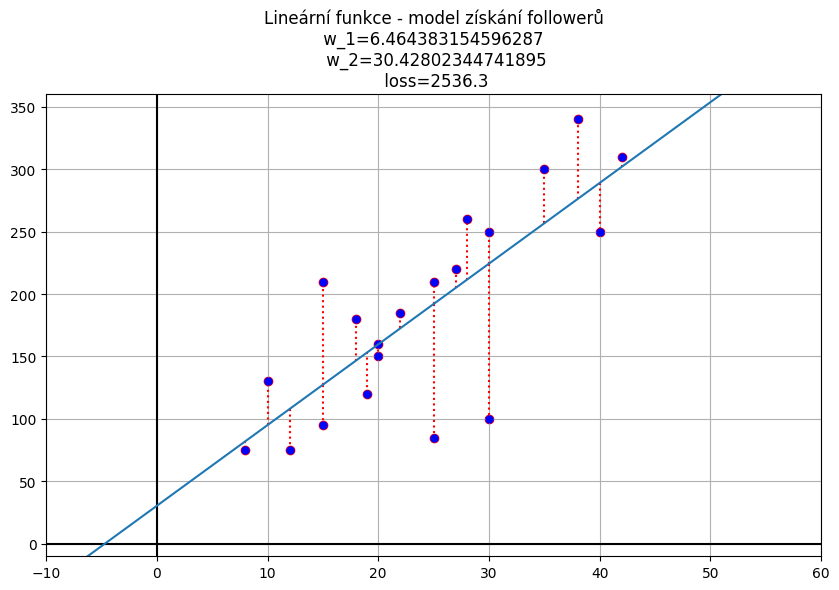

In [ ]:
from sklearn.linear_model import LinearRegression

# Vytvoříme instanci modelu
model_linear = LinearRegression()

# Naučíme model na datech - optimalizuje hodnoty vah w_1 a w_2 automaticky
model_linear.fit(df[['StoriesPosted']], df['NewFollowers'])

# Vypíšeme nejlepší nalezené hodnoty vah
print(f'w_1 = {model_linear.coef_[0]:.2f}')
print(f'w_2 = {model_linear.intercept_:.2f}')

# Vypíšeme hodnotu loss
print(f'Loss = {dataset_loss_linear(dataset=df, w_1=model_linear.coef_[0], w_2=model_linear.intercept_):.2f}')

# Vykreslíme graf
display_linear_function(-100, 500, dataset=df, loss_value=dataset_loss_linear(dataset=df, w_1=model_linear.coef_[0], w_2=model_linear.intercept_), w_1=model_linear.coef_[0], w_2=model_linear.intercept_)

## Kontrolní otázka - k čemu nám ten model je?

In [ ]:
# (vypneme warningy)
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import widgets, interact

def predict_new_followers(stories_posted):
    return model_linear.predict([[stories_posted]])[0]


# use input field instead of slider
def set_params(stories_posted):
    print(f'New followers = {predict_new_followers(stories_posted):.2f}')

interact(set_params, stories_posted=widgets.FloatText(value=20.0, description='Stories posted'))


interactive(children=(FloatText(value=20.0, description='Stories posted'), Output()), _dom_classes=('widget-in…

<function __main__.set_params(stories_posted)>

## Můžeme použít lepší funkci, než lineární...

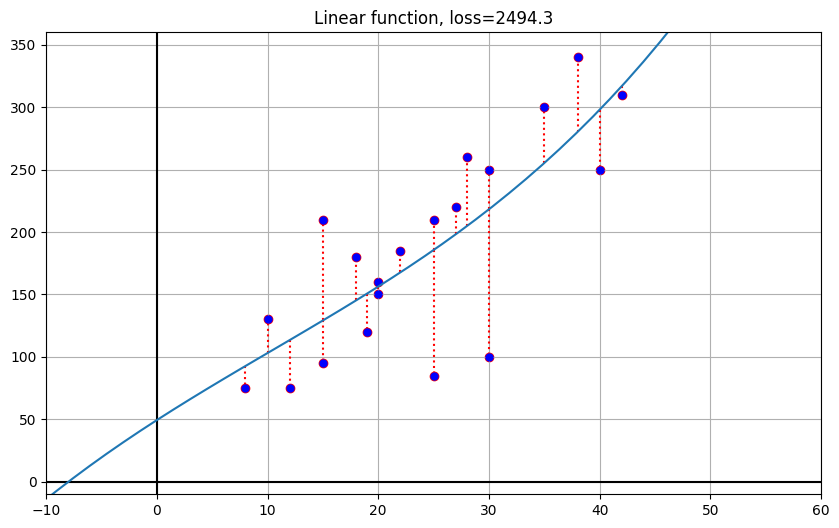

In [ ]:
# non-linear regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Vytvoříme instanci modelu s polynomem stupně 3
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression(),
)

# Natrénujeme model na datech
polynomial_regression.fit(df[['StoriesPosted']], df['NewFollowers'])

# Zobrazovač natrénovaného modelu s daty
def display_nonlinear_function(x_min, x_max, dataset, loss_value):
    x = np.linspace(x_min, x_max, 100)
    y = polynomial_regression.predict(x.reshape(-1, 1))

    # nastavíme pozici nulového bodu
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    # nastavíme rozsah zobrazení
    plt.xlim(-10, 60)
    plt.ylim(-10, 360)

    # vykreslení bodů z datasetu
    plt.scatter(df['StoriesPosted'], df['NewFollowers'], color='red')

    # vykreslení čar od bodů k funkci - čára je vlastně rozdíl "y_predicted - y_label"
    for i, row in dataset.iterrows():
        x_val = row['StoriesPosted']
        y_val = polynomial_regression.predict([[x_val]])[0]
        plt.plot([x_val, x_val], [y_val, row['NewFollowers']], color='red', linestyle='dotted')
        plt.plot(x_val, row['NewFollowers'], marker='o', markersize=5, color='blue')


    plt.grid(True)

    plt.plot(x, y)
    plt.title(f'Linear function, loss={loss_value:.1f}')

    # nastavení velikosti grafu
    plt.gcf().set_size_inches(10, 6)
    plt.show()



def dataset_loss_polynomial(dataset, w_1=1, w_2=2):
    '''
    Funkce pro výpočet hodnoty chybové funkce pro nelineární regresi na celém datasetu
    '''

    loss_value = 0

    # Projdeme všechny řádky v datasetu - každý řádek je jedna uživatelka
    for i, row in dataset.iterrows():

        # Načteme hodnotu požadovaného labelu
        y_label = row['NewFollowers']

        # Vypočítáme hodnotu predikce pro daný řádek
        y_predicted = polynomial_regression.predict([[row['StoriesPosted']]])[0]

        # Přičteme rozdíl mezi predikcí a label hodnotou k loss
        loss_value += (y_predicted - y_label) ** 2

    # Vydelíme počtem řádků v datasetu, abychom dostali průměrnou hodnotu loss
    N = len(dataset)
    loss_value = loss_value / N

    return loss_value


# Jak vypadá funkce, kterou jsme natrénovali?
loss_value = dataset_loss_polynomial(dataset=df)
display_nonlinear_function(-100, 50, dataset=df, loss_value=loss_value)

